<title>Customer Segmentation</title>

## Business Problem

### Description

Segmenting customers is the process of dividing up mass consumers into groups with similar needs and wants. It can help companies to focus on marketing efforts, so that customer satisfaction and overall profit could be achieved at higher rates. Segmentation exists to mitigate the inevitable problems that evolve from a "One size fits all" approach. Best in class suppliers develops different types of segmentation to understand how to create, position, and communicate the value of their offering to address the different needs required in different customer segments.
Many companies adopts different segmentation schemes, that is often develop best but static (snapshot of consumer's preferences at the moment). Market trends evolve over time. It may grow, decline or disappear within certain time period due to number of reasons like demographics trend, technological advancement, economic cycles etc.

###### Problem Statement

- We are tasked with understanding the behaviour of customers and group them into several clusters.
- We need a way to understand our customers in structured and shared manner.

### Sources or Useful Links

- Source:https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

###  Real World/Business objectives and Constraints

- Interpretability is important.
- Cost of Miscategorization can be high.

## Machine Learning Problem

### Data-Set Information

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

### Data Overview & Attribute Information

- Consists of 1067371 instances.

###### Features

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

### Mapping Realworld problem to machine learning problem

- This problem is a type of unsupervised learning, i.e. there is no target present in our data.
- Cluster customers based on their behavior.It will give us an approximation about the customer purchasing behavior leading to better marketing.

### Metrics

- Inertia is used to measure the quality of clusters

## Data Acquisition,Basic Statistics and Cleaning

### Import Packages

In [2]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Data

In [3]:
base_data=pd.read_csv(r"/content/drive/My Drive/A6/OnlineRetailV3.csv")
base_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2017-12-1,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2017-12-1,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2017-12-1,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2017-12-1,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2017-12-1,1.25,13085.0,United Kingdom


In [4]:
print(f"Number of instances:{base_data.shape[0]},Number of features:{base_data.shape[1]}")

Number of instances:1067371,Number of features:8


### Data Description

In [5]:
base_data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


###### Observation:
- Average price of all sales was **&pound;4.64 pounds**
- Average  Customer bought around 10 quantity .
- 25% of customers bought products with unit quantity.
- 75% of customers bought products with quantity <=10.
- Max quantity purchased is **&pound;80995 pounds**0.
- Maximum unit price is **&pound;38970 pounds**
- Initial Statistics shows that price and quantity have otliers in the data

### Null Value treatmment

In [6]:
null_df=pd.DataFrame(base_data.isna().sum(),columns=['null_values'])
print("Null values in each features:")
null_df=null_df.T
null_df

Null values in each features:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
null_values,0,0,4382,0,0,0,243007,0


- columns with null values are:Description-4382 and Customer ID-243007
- As we have enough data to process, it won't hurt us to drop the columns with null values.

In [7]:
base_data.dropna(subset=['Customer ID','Description'],inplace=True)
print("Null values after treatment:")
null_df_new=pd.DataFrame(base_data.isna().sum(),columns=['null_values'])
null_df_new=null_df_new.T
null_df_new

Null values after treatment:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
null_values,0,0,0,0,0,0,0,0


- We have eliminated rows/records with null value:

### Zero value Treatment

In [8]:
zero_df=pd.DataFrame(base_data[base_data==0].count(),columns=['zeros'])
zero_df=zero_df.T
print("Number of records were value is zero")
zero_df

Number of records were value is zero


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
zeros,0,0,0,0,0,71,0,0


- Their are total 71 record were price is 0.
- Price of a product cannot be zero.It may be because that particular order is cancelled.
- The number of instances/records gives us the luxury to drop records were values are zero.

In [9]:
base_data=base_data.loc[base_data['Price']!=0]
zero_df_new=pd.DataFrame(base_data[base_data==0].count(),columns=['zeros'])
zero_df_new=zero_df_new.T
print("Number of records were value is zero-after treatment")
zero_df_new

Number of records were value is zero-after treatment


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
zeros,0,0,0,0,0,0,0,0


- We have removed all the records where price is zero

### De duplication

In [10]:
base_data_copy=base_data.copy()
duplicated=base_data_copy.duplicated().sum()
print(f"Number of duplicated records before deduplication:{duplicated}")
print(f"shape of data before de duplication:{base_data_copy.shape}")
base_data.drop_duplicates(inplace=True)
duplicated=base_data.duplicated().sum()
print(f"Number of duplicated records after de duplication:{duplicated}")
print(f"shape of data after de duplication:{base_data.shape}")

Number of duplicated records before deduplication:26480
shape of data before de duplication:(824293, 8)
Number of duplicated records after de duplication:0
shape of data after de duplication:(797813, 8)


### Data Types Treatment

In [11]:
data_type_df=pd.DataFrame(base_data.dtypes,columns=['dtype'])
data_type_df=data_type_df.T
print("Data types of each features")
data_type_df

Data types of each features


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
dtype,object,object,object,int64,object,float64,float64,object


- Customer ID should be of datatype int.

In [12]:
# For datetime
import datetime
from datetime import datetime as dt

base_data['Customer ID'] = base_data['Customer ID'].astype(np.int64)

# Removing Time Factor (Example: 2017-12-01 07:45:00 --> 2017-12-01)
base_data['InvoiceDate'] = pd.to_datetime(base_data['InvoiceDate']).apply(dt.date)

# Transforming Object Type to Datetime
base_data['InvoiceDate'] = pd.to_datetime(base_data['InvoiceDate'])

data_type_df_new=pd.DataFrame(base_data.dtypes,columns=['dtype'])

data_type_df_new=data_type_df_new.T
print("Data types of each features-after treatment")
data_type_df_new

Data types of each features-after treatment


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
dtype,object,object,object,int64,datetime64[ns],float64,int64,object


- Changed datatype of Customer ID from float to int

### Negative value Treatment

In [13]:
temp_df=base_data[['Price','Quantity']]
neg_df=pd.DataFrame(temp_df[temp_df<0].count(),columns=['neg_values'])
neg_df=neg_df.T
print("Number of records were value is less than zero")
neg_df

Number of records were value is less than zero


,Price,Quantity
neg_values,0,18390


- There are total 18390 records where quantity is negative

In [14]:
base_data['Quantity']=np.abs(base_data['Quantity'])
base_data['Price']=np.abs(base_data['Price'])
temp_df=base_data[['Price','Quantity']]
neg_df=pd.DataFrame(temp_df[temp_df<0].count(),columns=['neg_values'])
neg_df=neg_df.T
print("Number of records were value is less than zero-after treatment")
neg_df

Number of records were value is less than zero-after treatment


,Price,Quantity
neg_values,0,0


- We have taken absolute values of quantity

## Feature Extraction

### Total_price

In [0]:
base_data['Total_price']=base_data['Price']*base_data['Quantity']

- New feature-->Total_price=Price*Quantity

In [16]:
import pickle
with open('/content/drive/My Drive/A6/base_data_cleaned','wb')as f:
  pickle.dump([base_data],f)
base_data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Total_price'],
      dtype='object')

## Advanced EDA

### Amount spend by countries:Top ten 

Text(0.5, 1.0, 'Country vs Total_price')

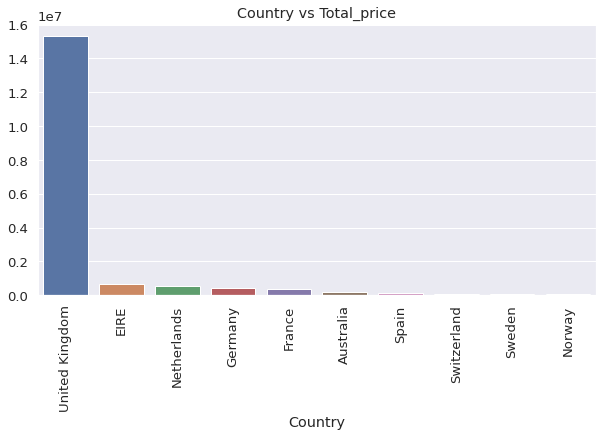

In [17]:
df=pd.DataFrame(base_data.groupby('Country')['Total_price'].sum().sort_values(ascending=False))
sns.set(font_scale=1.2)
y_val=df['Total_price'].values[:10]
x_val=df.index[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=x_val,y=y_val)
plt.xticks(rotation=90)
plt.title("Country vs Total_price")

**Observation:**

- **United Kingdom** **spent** **highest** than any other country on buying items.

### Demand of products:Top ten

Text(0.5, 1.0, 'Description vs Quantity')

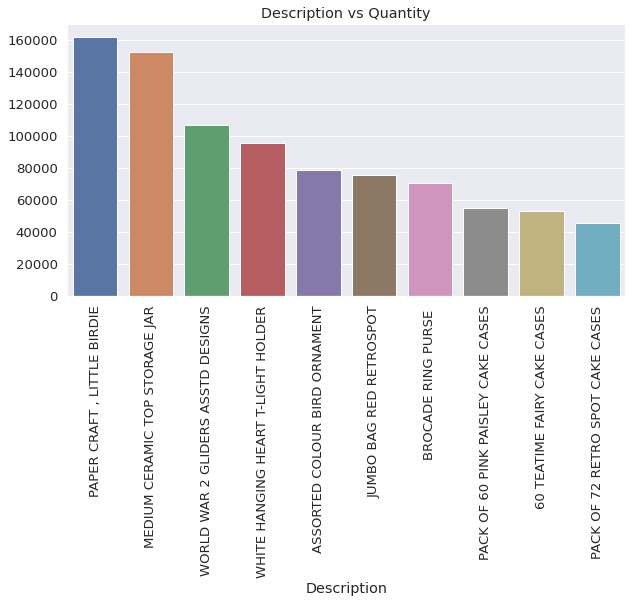

In [18]:
df=pd.DataFrame(base_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False))
y_val=df['Quantity'].values[:10]
x_val=df.index[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=x_val,y=y_val)
plt.xticks(rotation=90)
plt.title("Description vs Quantity")

**Observation:**

- **Paper craft,Storage jar** has been **sold** at **highest** **amount** of **quantity** than any other product item.

### Total Sales per day

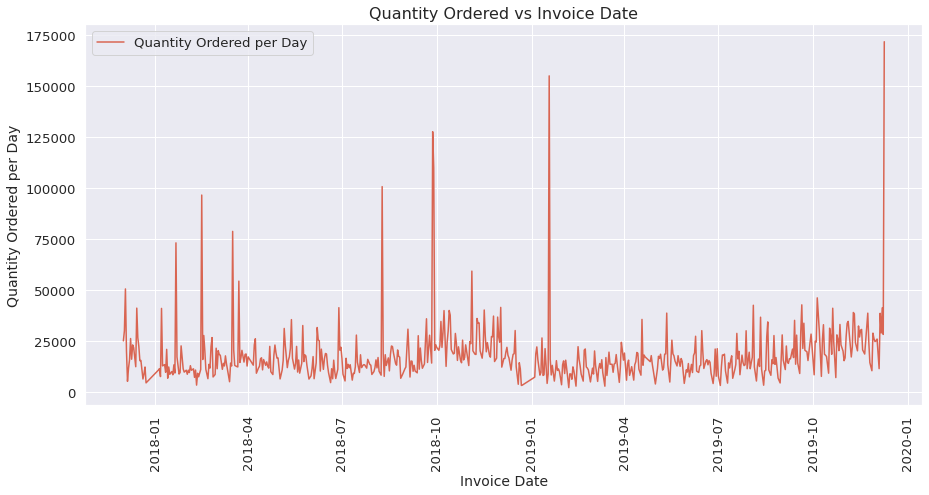

In [19]:
df = base_data.groupby(by = 'InvoiceDate', as_index = False).agg('sum')
figure = plt.figure(figsize = [15, 7])
sns.lineplot(x = 'InvoiceDate', y = 'Quantity', data = df, color = '#D96552')

plt.xlabel('Invoice Date', size = 14)
plt.ylabel('Quantity Ordered per Day', size = 14)
plt.xticks(rotation=90)
plt.legend(labels = ['Quantity Ordered per Day'])
plt.title('Quantity Ordered vs Invoice Date', size = 16)
plt.grid(b = True, axis = 'y')
plt.show()

**Observation:**

We can see high quantity ordered around the month of,

- September/October-2018 (~130000),

- January-2019 (~160000)and 

- January-2020 (~175000).

## KMeans

- We will be **segmenting** **customers** **based** **on** their **behaviour** i.e the **quantity ordered** and **total amount** on that product.

- **Firstly**, we will **run** **K-means** at **default setting**. Then we will **tune** it over **multiple** **K values**, **finding optimal K**.

- But **before** that we will **normalized two features** that are important for clustering i.e. **Quantity and Total_price**.

### Normalizing numerical features & Creating final data matrix

In [0]:
data_matrix=base_data[['Quantity','Total_price']]
data_matrix['Quantity'] = np.log1p(base_data['Quantity'])
data_matrix['Total_price'] = np.log1p(base_data['Total_price'])

### Hyper parameter tuning

In [21]:
from sklearn.cluster import KMeans
from tqdm import tqdm

clusters=[2,4,6,8]
inertia={}
for k in tqdm(clusters):
    km=KMeans(n_clusters=k,init='k-means++',n_init=5)
    km.fit(data_matrix)
    inertia[k]=km.inertia_  
with open('/content/drive/My Drive/A6/inertia','wb')as f:
    pickle.dump([clusters,inertia],f)

100%|██████████| 4/4 [00:19<00:00,  4.85s/it]


Text(0, 0.5, 'inertia')

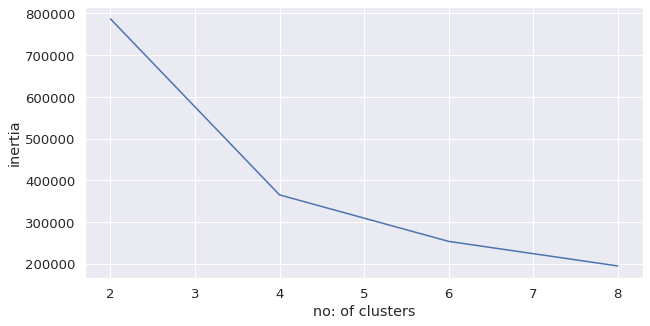

In [22]:
plt.figure(figsize=(10,5))
plt.plot(list(inertia.keys()),list(inertia.values()))
plt.xlabel('no: of clusters')
plt.ylabel('inertia')

**Observation:**

- As we can see that the **cluster sum of squared distances** **values** are **pretty high**.

- We can see that **after** **K = 4**, there is **significant** **drop** in **inertia**.

- So **K = 4 is optimal** for our **solution**.

### Kmeans clustering

In [0]:
km=KMeans(n_clusters=4,init='k-means++',n_init=5)
km.fit(data_matrix)
km_labels=km.labels_
km_centers = km.cluster_centers_

In [24]:
km_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [25]:
km_labels=km_labels.tolist()
unq_val=set(km_labels)
unq_val

{0, 1, 2, 3}

#### Visualizing the clusters

In [26]:
km_centers

array([[1.51205667, 2.73497756],
       [4.04405697, 4.62955351],
       [0.96134332, 1.32460115],
       [2.71318794, 2.8411586 ]])

In [27]:
km_centers[:,0]

array([1.51205667, 4.04405697, 0.96134332, 2.71318794])

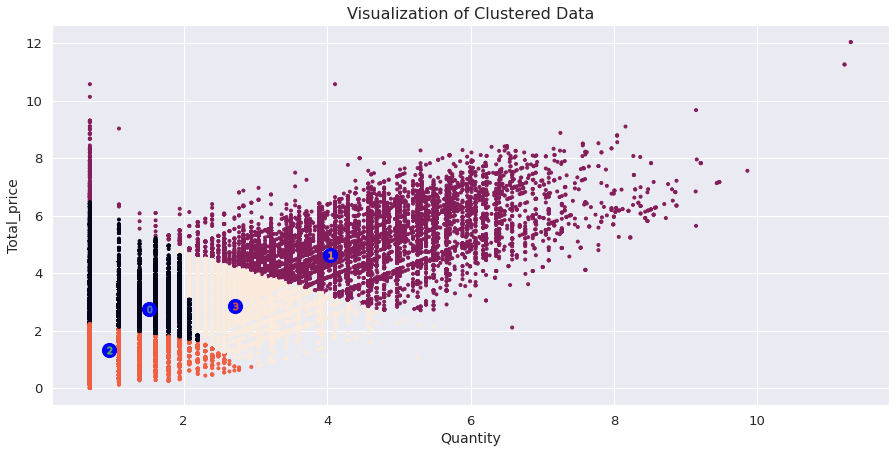

In [28]:
data_matrix['cluster']=km_labels
fig, ax1 = plt.subplots(1, 1, figsize = [15, 7])
ax1.scatter(x = data_matrix['Quantity'], y = data_matrix['Total_price'], marker='.', c = data_matrix['cluster'])
ax1.scatter(x = km_centers[:, 0], y = km_centers[:, 1], marker = 'o', c = "blue",s = 200)
for i, c in enumerate(km_centers):
   ax1.scatter(x = c[0], y = c[1], marker = '$%d$' % i,s = 50)
plt.xlabel(xlabel = 'Quantity', size = 14)
plt.ylabel(ylabel = 'Total_price', size = 14)
plt.title(label = 'Visualization of Clustered Data', size = 16)
plt.show()

**Observation:**

- We can see **clusters** and their **respective centroids** are very **dense**.

- **To** **understand** **better** we will **look** at the **count** of each **cluster label**.

In [40]:
labels=[i for i in km_labels]
labels[:5]

[1, 1, 1, 1, 3]

In [41]:
data_matrix['labels']=labels
data_matrix.head(3)

,Quantity,Total_price,cluster,labels
0,2.564949,4.435567,1,1
1,2.564949,4.406719,1,1
2,2.564949,4.406719,1,1


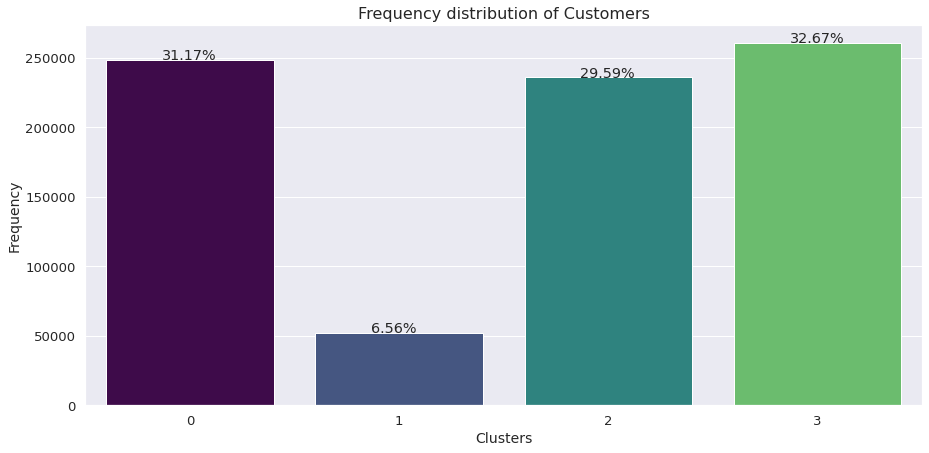

In [43]:
figure = plt.figure(figsize = [15, 7])
flatui = ["#440154", "#3B528B", "#21918C", "#5EC962", "#FDEB5E"]
ax = sns.countplot(x = 'labels', data = data_matrix, palette = sns.color_palette(flatui))

total = data_matrix.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/ total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Clusters', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title(label = 'Frequency distribution of Customers', size = 16)
plt.show()

**Observation:**
- observations from frequency distribution of customers and visualization of clusters.

- We can see that **clusters 1 and 3 are more profitable** **because** they seem to **order more quantity** as well as have **high purchase** values.Here eventhough frequency of purchase is less for cluster1,they order more quantity.These may be wholesale customers.

- For the **cluster 2**, both the **quantity and purchase** value is **less**.

- For the **cluster 0**, though the **quantity** ordered is **less**, the **purchase** value is **similar** to cluster 3.

- On the other hand, the **cluster 3** has **higher quantity** ordered **than cluster 0** but not much differrence in **purchase**.

## Conclusion

- We **studied in depth about the data**, its **characteristics** and its **distribution**.

- We **explored various questions** related to the **customer behaviour** and their **residency** and **buying habits**.

- We **adopted K-Meanss** to **solve** this **business problem**:

-